# Prédiction des mêmes chansons

Import des librairies utiles

In [1]:
import pandas as pd
import psycopg2
import util
import numpy as np
import matplotlib.pyplot as plt

# Connexion à la base de données locale
conn = psycopg2.connect(host="localhost",
                        database="NOPLP",
                        user="postgres",
                        password="Objectifcentrale2019!")
cur = conn.cursor()

In [2]:
dateSimule = input("Entrer la date au format 'yyyy-MM-dd' : ")

Chargement des données dans un dataframe

In [3]:
df = pd.read_sql_query('SELECT titre, artiste, "année",	nb_mots, "clusterID", (SELECT AVG(laps) FROM public."LapsMCDP"(titre,' + dateSimule + ')) AS MCDPmoy, (SELECT laps FROM public."LapsMCDP"(titre,' + dateSimule + ') LIMIT 1 ) AS MCDP, (SELECT AVG(laps) FROM public."LapsMCMCDP"(titre,' + dateSimule + ')) AS MCMCDPmoy, (SELECT laps FROM public."LapsMCMCDP"(titre,' + dateSimule + ') LIMIT 1 ) AS MCMCDP, public."DeltaDate"(titre, ' + dateSimule + ',(' + dateSimule + '::date - INTERVAL\'30 day\')::date), public."DeltaDateMC"(titre, ' + dateSimule + ',(' + dateSimule + '::date - INTERVAL\'30 day\')::date) FROM public."MêmesChansons"',con=conn)
df

,titre,artiste,année,nb_mots,clusterID,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC
0,Vous permettez Monsieur,Adamo Salvatore,1964.0,NaN,2,59.000000,59.0,NaN,NaN,131.0,72.0
1,Je veux tes yeux,Angèle,2018.0,NaN,2,77.000000,77.0,NaN,NaN,105.0,730.0
2,Tout oublier,Angèle,2018.0,NaN,3,91.000000,91.0,NaN,NaN,113.0,NaN
3,Désormais,Aznavour Charles,1969.0,NaN,0,42.000000,42.0,NaN,NaN,130.0,619.0
4,Emmenez-moi,Aznavour Charles,1968.0,NaN,3,NaN,NaN,NaN,NaN,105.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
534,Le temps qui court,Chamfort Alain,1975.0,NaN,1,52.000000,86.0,163.500000,194.0,93.0,121.0
535,Manureva,Chamfort Alain,1979.0,NaN,0,45.000000,45.0,NaN,NaN,31.0,533.0
536,Le sens de la vie,Tal,2012.0,383.0,1,92.000000,115.0,203.666667,306.0,51.0,152.0
537,Les mots bleus,Christophe,1975.0,NaN,1,69.833333,74.0,127.000000,111.0,107.0,33.0


Histogramme des écarts même chanson dernier passage moyens

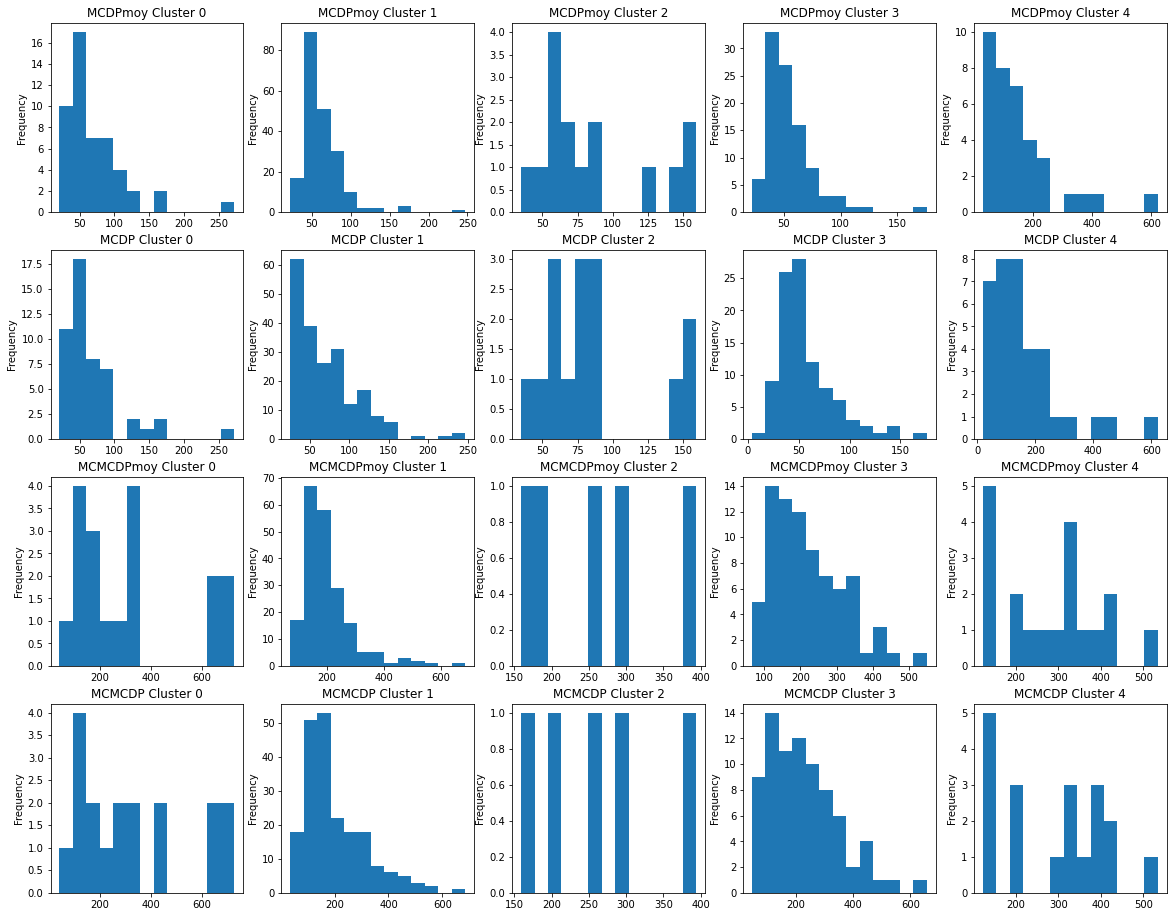

In [4]:
plt.figure(1, figsize=(20,16))
bins1 = [13,13,13,13,13]
for i in range(0,5):
    plt.subplot(4,5,i+1)
    df[df['clusterID'] == i]['mcdpmoy'].plot.hist(bins=bins1[i])
    plt.title("MCDPmoy Cluster {}".format(i))
bins2 = [13,13,13,13,13]
for i in range(0,5):
    plt.subplot(4,5,5+i+1)
    df[df['clusterID'] == i]['mcdp'].plot.hist(bins=bins2[i])
    plt.title("MCDP Cluster {}".format(i))
bins3 = [13,13,13,13,13]
for i in range(0,5):
    plt.subplot(4,5,10+i+1)
    df[df['clusterID'] == i]['mcmcdpmoy'].plot.hist(bins=bins3[i])
    plt.title("MCMCDPmoy Cluster {}".format(i))
bins4 = [13,13,13,13,13]
for i in range(0,5):
    plt.subplot(4,5,15+i+1)
    df[df['clusterID'] == i]['mcmcdp'].plot.hist(bins=bins4[i])
    plt.title("MCMCDP Cluster {}".format(i))

Calcul des coefficients

In [5]:
histoMCDPmoy = util.histo(df, bins1, 'mcdpmoy')
valeursHistoMCDPmoy = [util.getHistoValues(h) for h in histoMCDPmoy]
histoMCDP = util.histo(df, bins2, 'mcdp')
valeursHistoMCDP = [util.getHistoValues(h) for h in histoMCDP]
histoMCMCDPmoy = util.histo(df, bins3, 'mcmcdpmoy')
valeursHistoMCMCDPmoy = [util.getHistoValues(h) for h in histoMCMCDPmoy]
histoMCMCDP = util.histo(df, bins4, 'mcmcdp')
valeursHistoMCMCDP = [util.getHistoValues(h) for h in histoMCMCDP]

Calcul des scores

In [6]:
df = util.scoreHisto(df, valeursHistoMCDPmoy, 'DeltaDate', 'f')
df = util.scoreHisto(df, valeursHistoMCDP, 'DeltaDate', 'g')
df = util.scoreHisto(df, valeursHistoMCMCDPmoy, 'DeltaDateMC', 'h')
df = util.scoreHisto(df, valeursHistoMCMCDP, 'DeltaDateMC', 'i')
df[['titre', 'artiste', 'clusterID', 'DeltaDate', 'DeltaDateMC', 'f', 'g', 'h', 'i']].sample(10)

,titre,artiste,clusterID,DeltaDate,DeltaDateMC,f,g,h,i
130,Etats d'amour,Amir,3,66.0,1000.0,0.161616,0.121212,0.000000,0.000000
46,Aimer jusqu'à l'impossible,Arena Tina,3,102.0,207.0,0.030303,0.030303,0.151899,0.151899
8,Rue des étoiles,Grégoire,1,79.0,39.0,0.146341,0.151220,NaN,0.102439
30,Joe le taxi,Paradis Vanessa,0,143.0,459.0,0.000000,0.020000,0.000000,0.111111
0,C'est la ouate,Loeb Caroline,2,95.0,46.0,0.000000,0.000000,NaN,NaN
115,Le blues du businessman,Starmania,1,66.0,140.0,0.248780,0.126829,0.326829,0.248780
29,On dirait,Amir,3,84.0,151.0,0.030303,0.060606,0.164557,0.139241
84,"Besoin de rien, envie de toi",Peter et Sloane,3,170.0,483.0,0.010101,0.010101,0.000000,0.012658
38,Maldonne,Zouk Machine,4,1000.0,710.0,0.000000,0.000000,0.000000,0.000000
138,Ces soirées-là,Yannick,3,61.0,1000.0,0.161616,0.121212,0.000000,0.000000


In [7]:
df['score'] = df['f']*df['g']*df['h']*df['i']*10000
df

,titre,artiste,année,nb_mots,clusterID,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f,g,h,i,score
0,Padam padam,Piaf Édith,1951.0,NaN,0,55.000000,55.0,680.0,680.0,114.0,59.0,0.080000,0.000000,1.944444,1.944444,0.000000
1,Un homme heureux,Sheller William,1991.0,NaN,0,103.000000,48.0,192.0,192.0,123.0,75.0,0.040000,0.040000,1.944444,1.944444,60.493827
2,L'oiseau et l'enfant,Myriam Marie,1977.0,NaN,0,82.000000,82.0,NaN,NaN,159.0,77.0,0.040000,0.040000,1.944444,1.944444,60.493827
3,Chante… (comme si tu devais mourir demain),Fugain Michel et le Big Bazar,1973.0,NaN,0,107.333333,49.0,331.5,439.0,137.0,88.0,0.000000,0.020000,1.944444,1.944444,0.000000
4,Onde sensuelle,M,1999.0,131.0,0,41.000000,31.0,104.0,104.0,40.0,113.0,0.240000,0.260000,0.222222,0.222222,30.814815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,Comme toi,Goldman Jean-Jacques,1983.0,NaN,4,148.000000,148.0,NaN,NaN,329.0,613.0,0.027778,0.027778,0.000000,0.000000,0.000000
37,Les villes de solitude,Sardou Michel,1973.0,NaN,4,40.000000,40.0,NaN,NaN,667.0,627.0,0.000000,0.000000,0.000000,0.000000,0.000000
38,Maldonne,Zouk Machine,NaN,NaN,4,NaN,NaN,NaN,NaN,1000.0,710.0,0.000000,0.000000,0.000000,0.000000,0.000000
39,La déclaration d'amour,Gall France,1974.0,NaN,4,NaN,NaN,NaN,NaN,185.0,758.0,0.111111,0.111111,0.000000,0.000000,0.000000


In [8]:
df = df.sort_values(by='score', ascending=False)
df.to_csv('test.csv', sep=";", encoding='utf8')
# np.where(df['titre'] == 'Ça fait mal')[0][0]
